# Análise e Modelos - Turing 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn  as sns

In [2]:
df = pd.read_csv('insurance_claim.csv')

FileNotFoundError: ignored

## Análise de *features*

In [ ]:
df_features = df.drop(columns='OUTCOME')

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12302 entries, 0 to 12301
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   12302 non-null  object 
 1   AGE                  12302 non-null  object 
 2   GENDER               12302 non-null  object 
 3   RACE                 12302 non-null  object 
 4   DRIVING_EXPERIENCE   12302 non-null  object 
 5   EDUCATION            12302 non-null  object 
 6   INCOME               12302 non-null  object 
 7   CREDIT_SCORE         12302 non-null  object 
 8   VEHICLE_OWNERSHIP    12302 non-null  object 
 9   VEHICLE_YEAR         12302 non-null  object 
 10  MARRIED              12302 non-null  object 
 11  CHILDREN             12302 non-null  object 
 12  LOCALITY             12302 non-null  object 
 13  ANNUAL_MILEAGE       12302 non-null  float64
 14  VEHICLE_TYPE         12302 non-null  object 
 15  SPEEDING_VIOLATIONS  12302 non-null 

In [ ]:
df_features.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,yes,after 2015,no,yes,New York,12000.0,sedan,0,0.0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,no,before 2015,no,no,New York,16000.0,sedan,0,0.0,0.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,yes,before 2015,no,no,New York,11000.0,sedan,0,0.0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0.0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,yes,before 2015,no,no,Miami,12000.0,sedan,2,0.0,1.0


### Distribuições

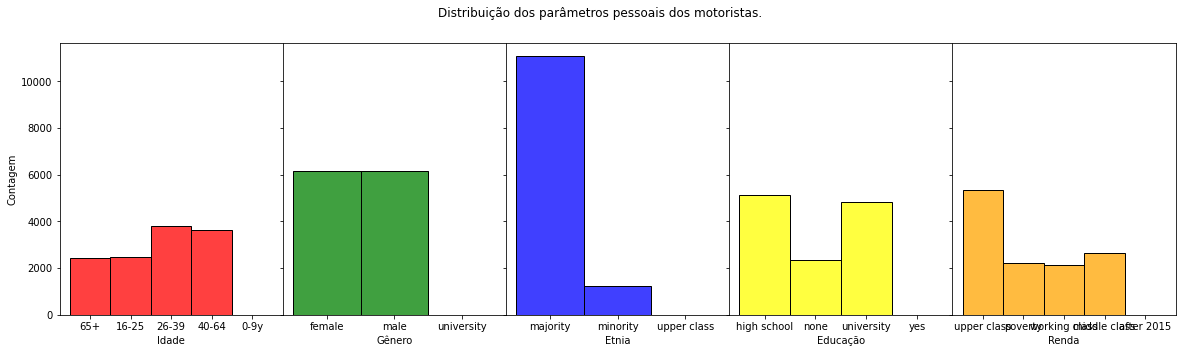

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,5), sharey=True, gridspec_kw={ 'wspace': 0 })

plt.suptitle('Distribuição dos parâmetros pessoais dos motoristas.')

sns.histplot(df_features['AGE'], bins=20, color='red', ax=axs[0])
axs[0].set_xlabel('Idade')

sns.histplot(df_features['GENDER'], bins=20, color='green', ax=axs[1])
axs[1].set_xlabel('Gênero')

sns.histplot(df_features['RACE'], bins=20, color='blue', ax=axs[2])
axs[2].set_xlabel('Etnia')

sns.histplot(df_features['EDUCATION'], bins=20, color='yellow', ax=axs[3])
axs[3].set_xlabel('Educação')

sns.histplot(df_features['INCOME'], bins=20, color='orange', ax=axs[4])
axs[4].set_xlabel('Renda')

axs[0].set_ylabel('Contagem')

plt.show()

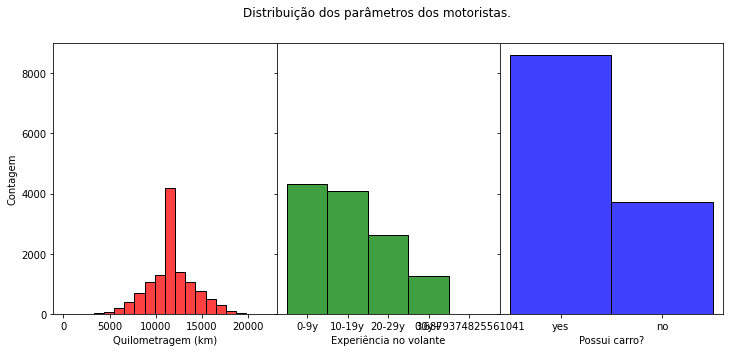

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,5), sharey=True, gridspec_kw={ 'wspace': 0 })

plt.suptitle('Distribuição dos parâmetros dos motoristas.')

sns.histplot(df_features['ANNUAL_MILEAGE'], bins=20, color='red', ax=axs[0])
axs[0].set_xlabel('Quilometragem (km)')

sns.histplot(df_features['DRIVING_EXPERIENCE'], color='green', ax=axs[1])
axs[1].set_xlabel('Experiência no volante')

sns.histplot(df_features['VEHICLE_OWNERSHIP'], color='blue', ax=axs[2])
axs[2].set_xlabel('Possui carro?')

axs[0].set_ylabel('Contagem')

plt.show()

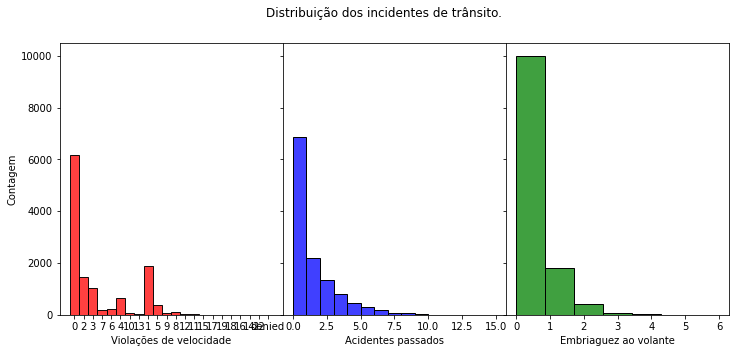

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,5), sharey=True, gridspec_kw={ 'wspace': 0 })

plt.suptitle('Distribuição dos incidentes de trânsito.')

sns.histplot(df_features['SPEEDING_VIOLATIONS'], bins=20, color='red', ax=axs[0])
axs[0].set_xlabel('Violações de velocidade')

sns.histplot(df_features['PAST_ACCIDENTS'], bins=15, color='blue', ax=axs[1])
axs[1].set_xlabel('Acidentes passados')

sns.histplot(df_features['DUIS'], bins=7, color='green', ax=axs[2])
axs[2].set_xlabel('Embriaguez ao volante')

axs[0].set_ylabel('Contagem')

plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Distribuição do score de crédito.')
sns.histplot(df['CREDIT_SCORE'])
plt.xlabel('Score de crédito')
plt.ylabel('Contagem')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe8f4937ee0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe8f4937dc0> (for post_execute):


KeyboardInterrupt: ignored

### Correlações entre *features* categóricas

In [ ]:
df_features['AGE'] = pd.Categorical(df_features['AGE'], ['16-25', '26-39', '40-64', '65+'])

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Correlação entre idade e renda')
sns.histplot(data=df_features, x='AGE', hue='INCOME', multiple='dodge', shrink=0.8)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [ ]:
df_features['EDUCATION'] = pd.Categorical(df_features['EDUCATION'], ['none', 'high school', 'university'])

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Correlação entre educação e gênero')
sns.histplot(data=df_features, x='EDUCATION', hue='GENDER', multiple='dodge', shrink=0.8)
plt.xlabel('Educação')
plt.ylabel('Contagem')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Correlação entre educação e renda')
sns.histplot(data=df_features, x='EDUCATION', hue='INCOME', multiple='dodge', shrink=0.8)
plt.xlabel('Educação')
plt.ylabel('Contagem')
plt.show()

### Análise de correlação de *features* numéricas

In [ ]:
df_features['GENDER'] = pd.Categorical(df_features['GENDER'], ['male', 'female'])
df_features['RACE'] = pd.Categorical(df_features['RACE'], ['majority', 'minority'])
df_features['INCOME'] = pd.Categorical(df_features['INCOME'], ['poverty', 'working class', 'middle class', 'upper class'])
df_features['DRIVING_EXPERIENCE'] = pd.Categorical(df_features['DRIVING_EXPERIENCE'], ['0-9y', '10-19y', '20-29y', '30y+'])
df_features['VEHICLE_OWNERSHIP'] = pd.Categorical(df_features['VEHICLE_OWNERSHIP'], ['yes', 'no'])

In [ ]:
df_features = df_features.drop(columns=['ID'])

In [ ]:
cats = [ 'AGE', 'RACE', 'GENDER', 'EDUCATION', 'INCOME', 'DRIVING_EXPERIENCE', 'VEHICLE_OWNERSHIP' ]

In [ ]:
for cat in cats:
  df_features[cat].replace(
      list(df_features[cat].cat.categories),
      range(len(df_features[cat].cat.categories)),
      inplace=True
  )
  df_features[cat] = df_features[cat].astype('int')

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Heatmap da correlação entre features.')
sns.heatmap(df_features.corr(), annot=True, cmap="crest", fmt='.2f')
plt.show()

## Análise de *outcome*

## Referências

**Tutoriais**

**Artigos**

- https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/

**Documentação**

- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html